### I. Introduction

### II. Import Library

In [142]:
random = 12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# split data into train and test
from sklearn.model_selection import train_test_split

# check outlier
from util.feature_engineering import detect_outlier

# pipeline
from sklearn.pipeline import Pipeline

# feature scaling and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# sklearn ColumnTransformer
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#cros val score
from sklearn.model_selection import cross_val_score

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import classification_report, accuracy_score


### III. Loading Dataset

In [56]:
df = pd.read_csv('dataset_final.csv')
df.head(25)

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,sensor,type
0,-11.98,-10.99,-19.12,-17.28,-33.13,-28.45,-48.83,-40.77,-62.49,-50.82,QCM10,1-Octanol
1,-12.15,-11.33,-22.33,-19.95,-39.82,-33.64,-56.90,-46.77,-73.32,-58.96,QCM10,1-Octanol
2,-12.58,-11.74,-26.67,-23.34,-46.48,-38.69,-65.95,-53.46,-84.53,-67.21,QCM10,1-Octanol
3,-13.79,-12.82,-30.56,-26.18,-52.30,-42.98,-73.81,-59.19,-94.41,-74.40,QCM10,1-Octanol
4,-15.73,-13.87,-34.54,-28.65,-57.44,-46.26,-80.37,-63.49,-102.94,-80.25,QCM10,1-Octanol
5,-58.41,-38.66,-83.58,-57.33,-110.24,-76.80,-133.77,-96.13,-171.05,-124.15,QCM10,1-Propanol
6,-59.68,-40.01,-84.75,-58.75,-109.91,-77.28,-130.65,-94.69,-161.81,-118.70,QCM10,1-Propanol
7,-60.12,-40.73,-85.19,-59.47,-108.08,-76.43,-127.51,-92.88,-155.54,-114.76,QCM10,1-Propanol
8,-60.41,-41.20,-84.73,-59.31,-106.46,-75.39,-124.62,-90.88,-151.56,-112.58,QCM10,1-Propanol
9,-60.87,-39.88,-84.22,-57.58,-105.32,-73.36,-122.59,-88.28,-146.99,-109.52,QCM10,1-Propanol


In [57]:
df.shape

(125, 12)

### IV. Exploratory Data Analysis

#### 1. Statistic Summary & Data Overview

Numerical Variable

In [58]:
df.describe()

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-52.384480,-51.529200,-82.660160,-78.155200,-117.079120,-107.839040,-151.437360,-138.120160,-190.693680,-173.198880
std,26.613388,24.374974,42.272666,36.560875,62.101935,52.594443,82.641805,70.392947,108.159961,92.772823
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000
25%,-69.990000,-66.490000,-110.460000,-105.210000,-157.610000,-144.980000,-210.780000,-189.320000,-263.800000,-250.300000
50%,-58.410000,-55.730000,-91.650000,-82.390000,-118.700000,-105.510000,-156.310000,-126.300000,-192.030000,-157.010000
75%,-28.790000,-35.170000,-43.820000,-50.840000,-58.240000,-68.000000,-75.410000,-77.510000,-93.950000,-91.330000
max,-9.400000,-7.950000,-14.430000,-17.280000,-24.640000,-27.350000,-35.280000,-39.910000,-40.630000,-49.870000


Categorical Variable

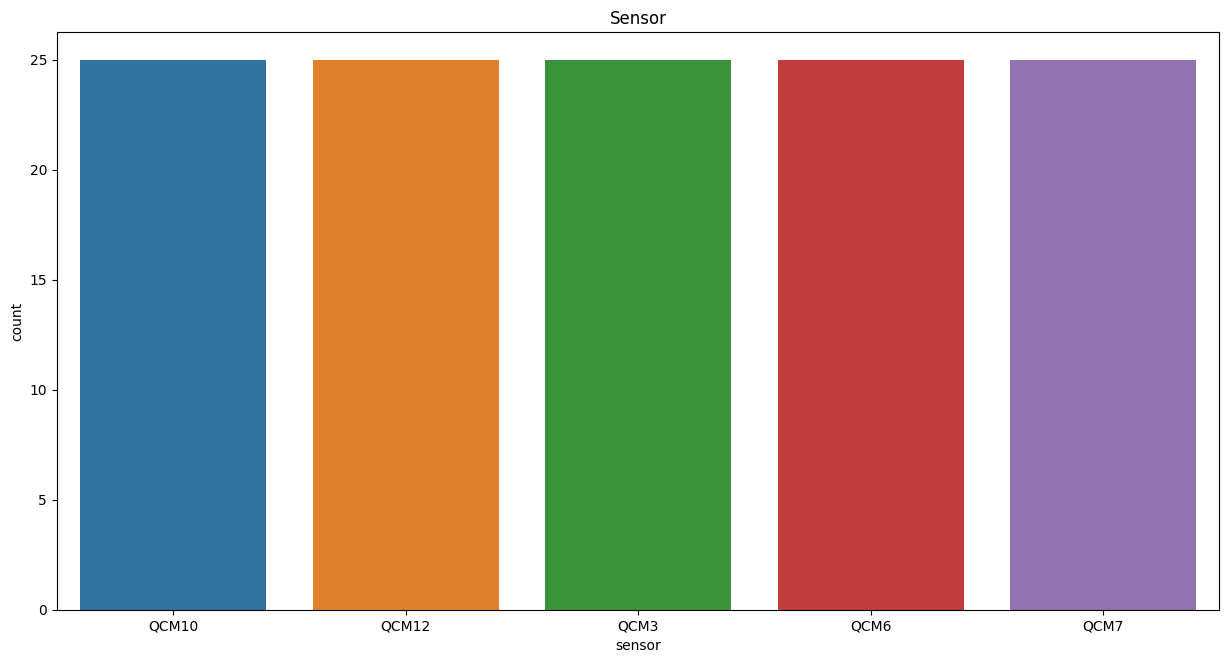

In [59]:
plt.figure(figsize=(15,7.5))
sns.countplot(x=df.sensor)
plt.title('Sensor')
plt.show()

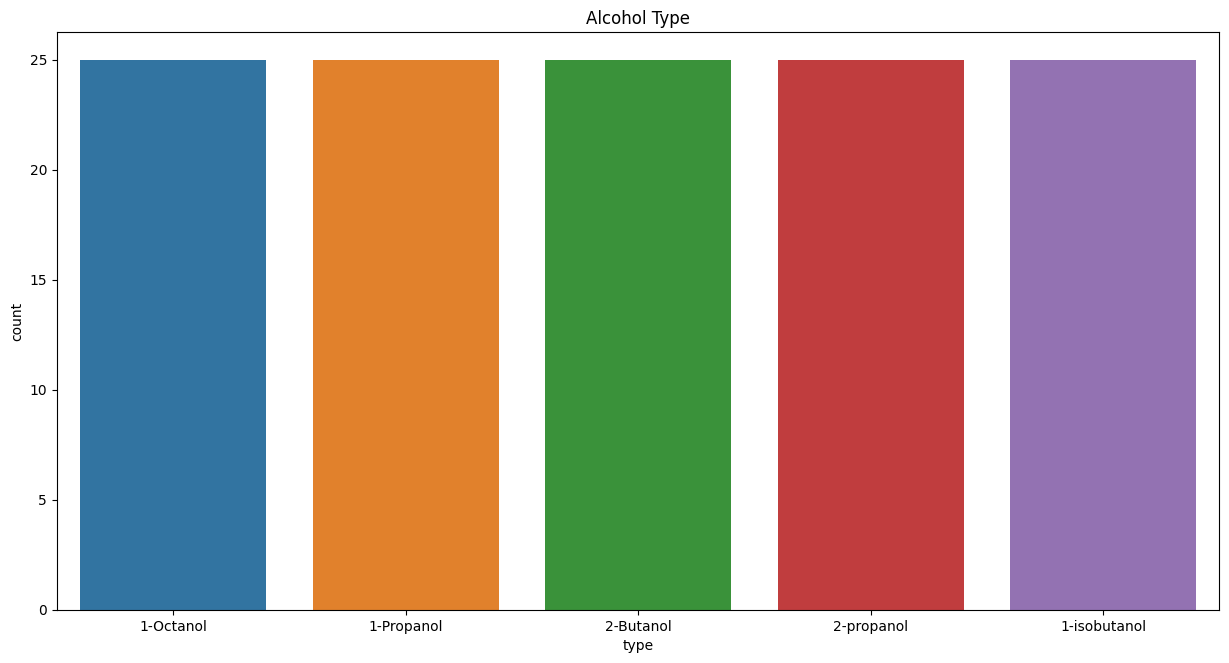

In [60]:
plt.figure(figsize=(15,7.5))
sns.countplot(x=df.type)
plt.title('Alcohol Type')
plt.show()

#### 2. Histogram And Boxplot

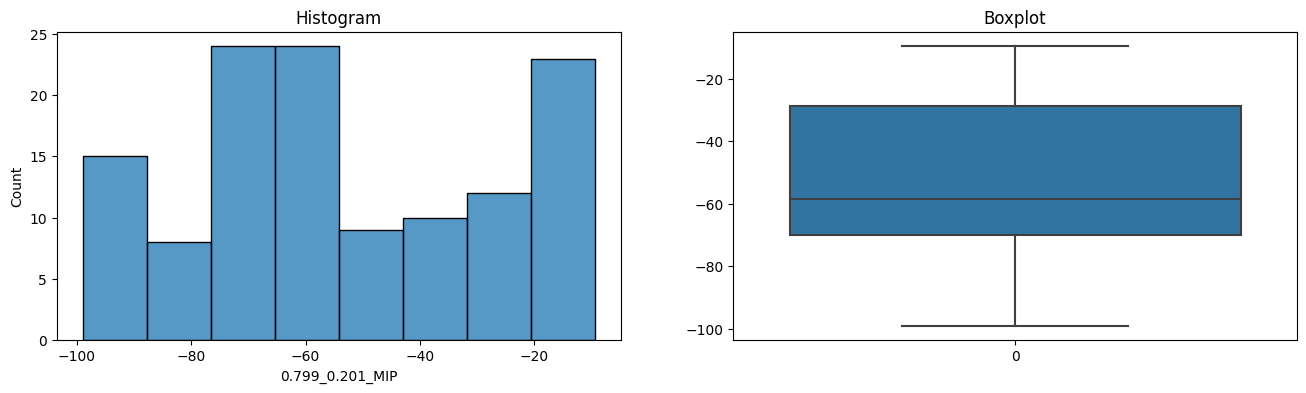

In [61]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.799_0.201_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.799_0.201_MIP'])
plt.title('Boxplot')

plt.show()

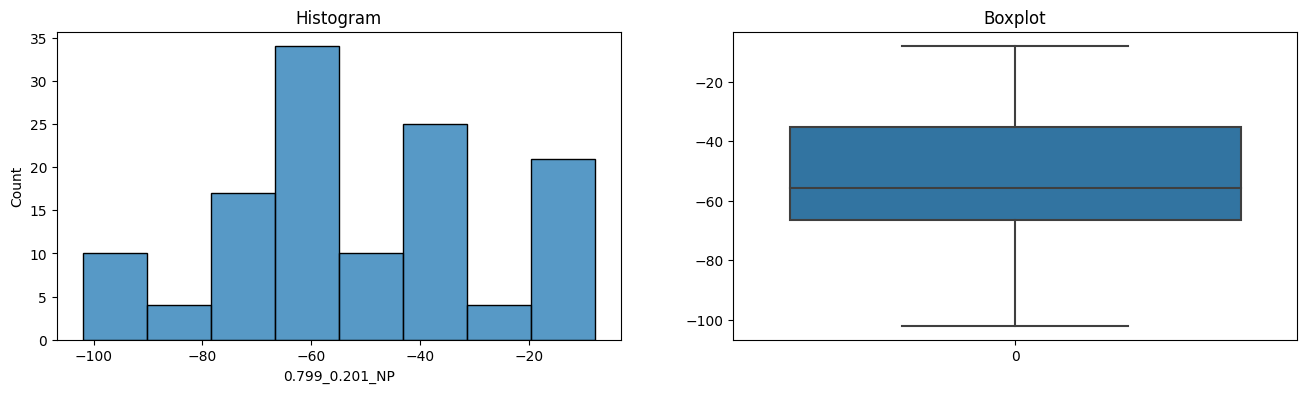

In [62]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.799_0.201_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.799_0.201_NP'])
plt.title('Boxplot')

plt.show()

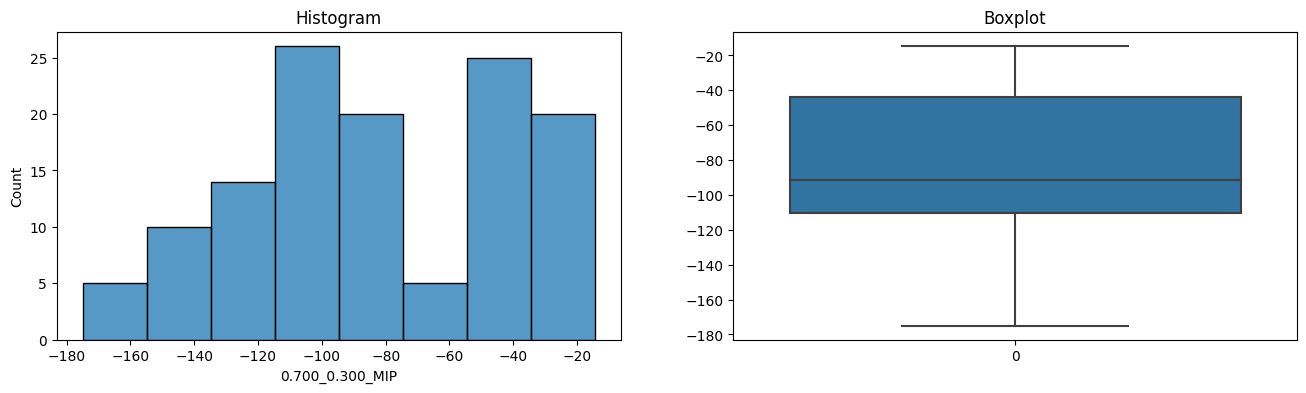

In [63]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.700_0.300_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.700_0.300_MIP'])
plt.title('Boxplot')

plt.show()

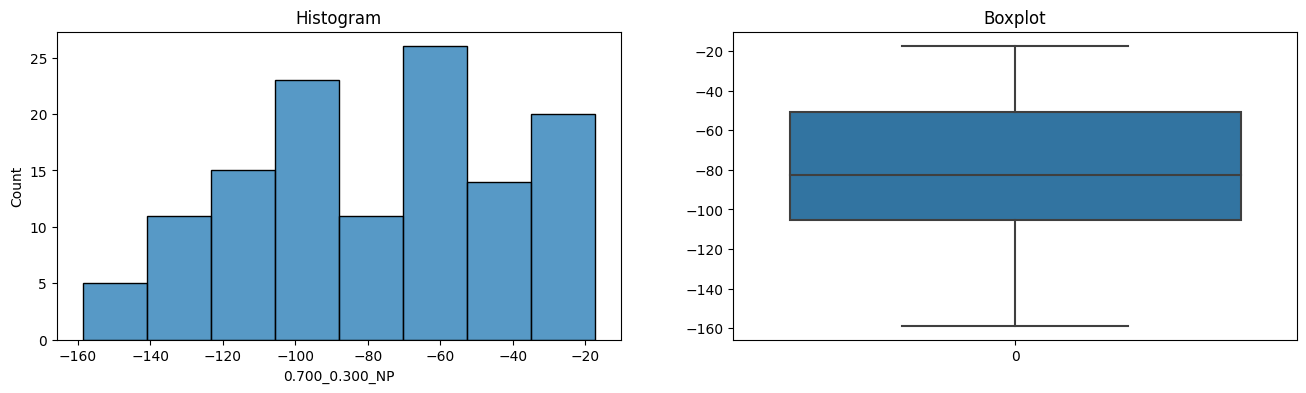

In [64]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.700_0.300_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.700_0.300_NP'])
plt.title('Boxplot')

plt.show()

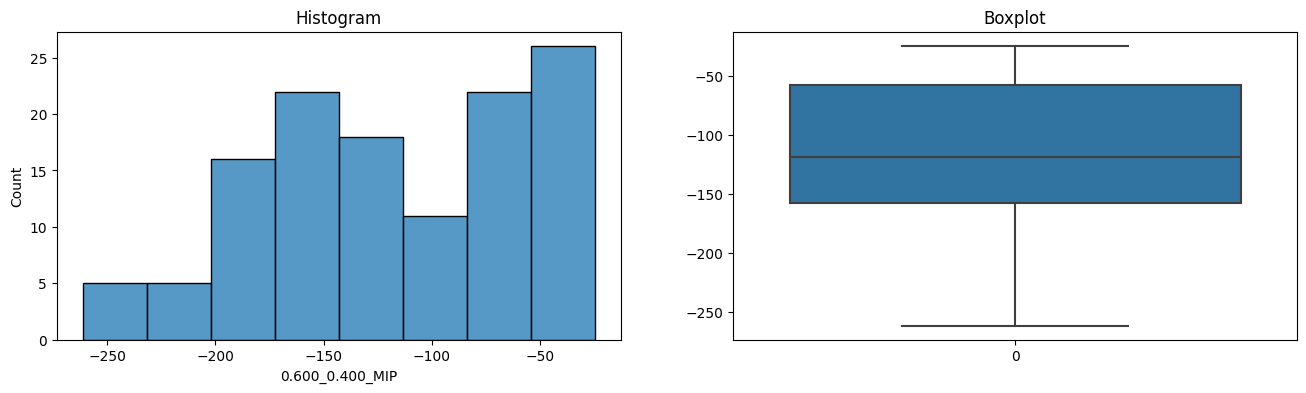

In [65]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.600_0.400_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.600_0.400_MIP'])
plt.title('Boxplot')

plt.show()

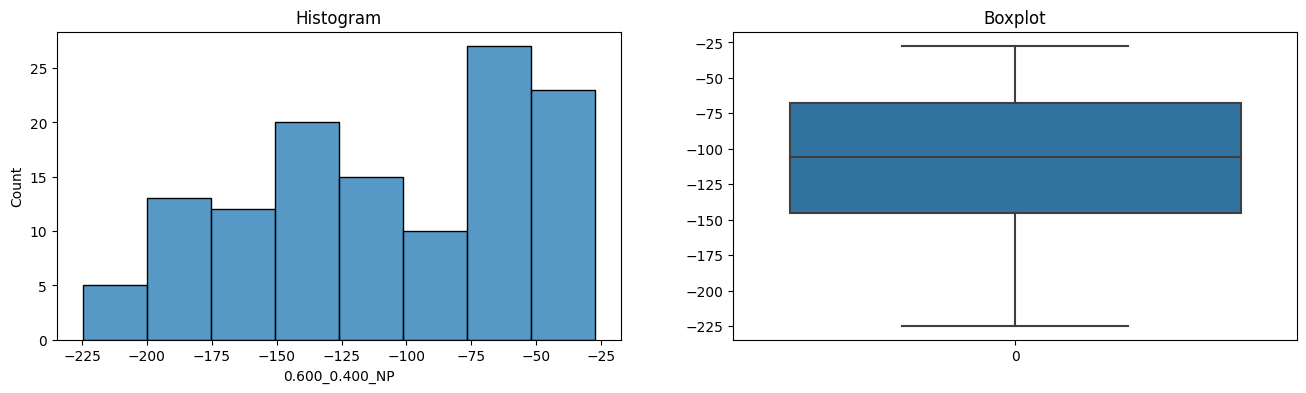

In [66]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.600_0.400_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.600_0.400_NP'])
plt.title('Boxplot')

plt.show()

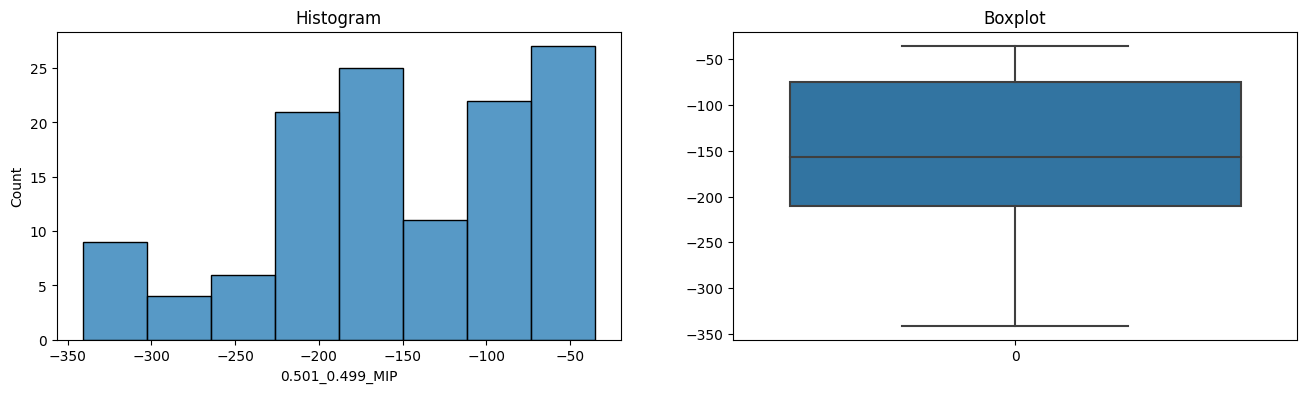

In [67]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.501_0.499_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.501_0.499_MIP'])
plt.title('Boxplot')

plt.show()

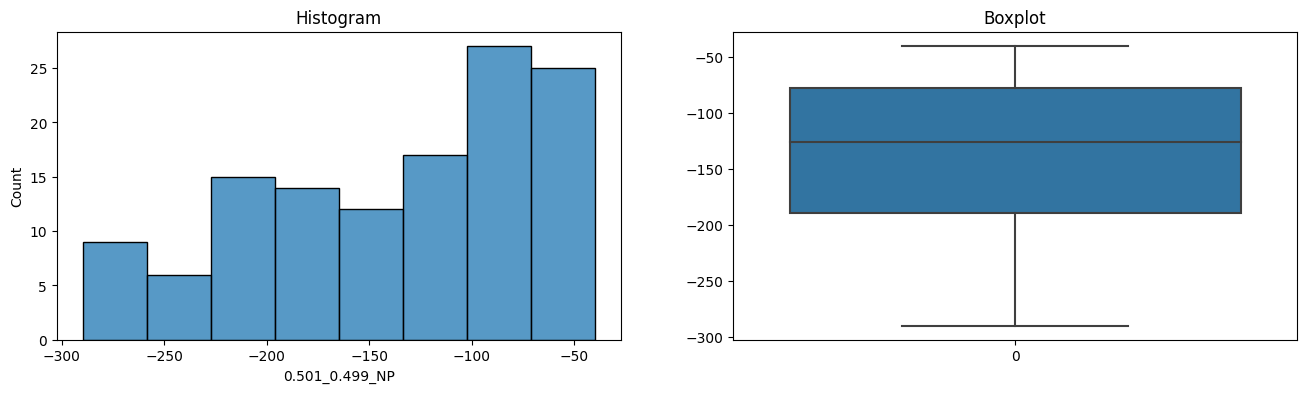

In [68]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.501_0.499_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.501_0.499_NP'])
plt.title('Boxplot')

plt.show()

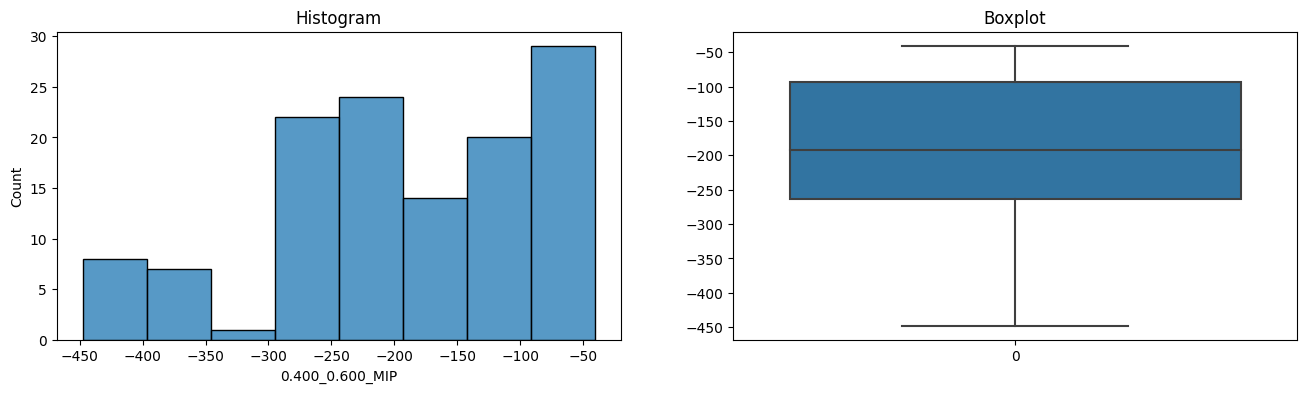

In [69]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.400_0.600_MIP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.400_0.600_MIP'])
plt.title('Boxplot')

plt.show()

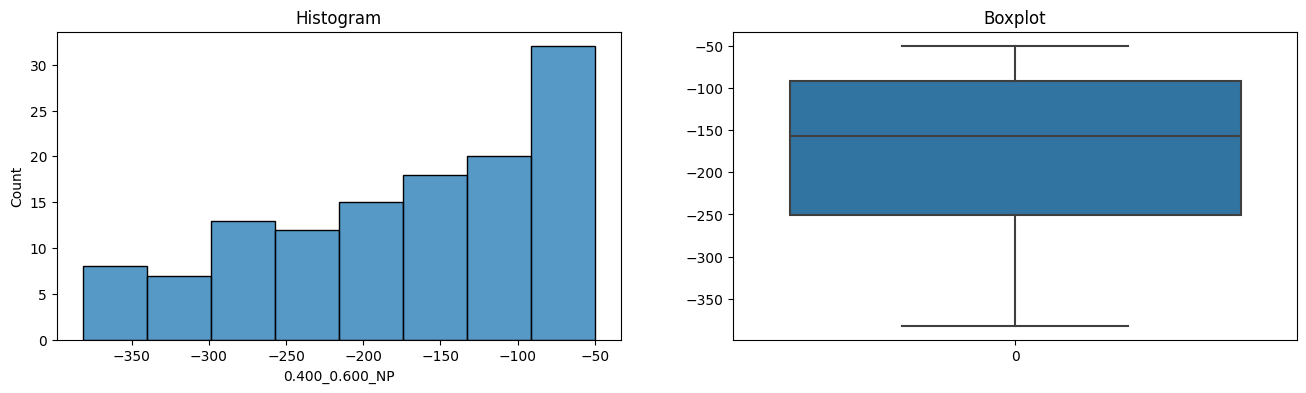

In [70]:
plt.figure(figsize=(16,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(df['0.400_0.600_NP'])
plt.title('Histogram')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(df['0.400_0.600_NP'])
plt.title('Boxplot')

plt.show()

#### 3. Correlation Analysis

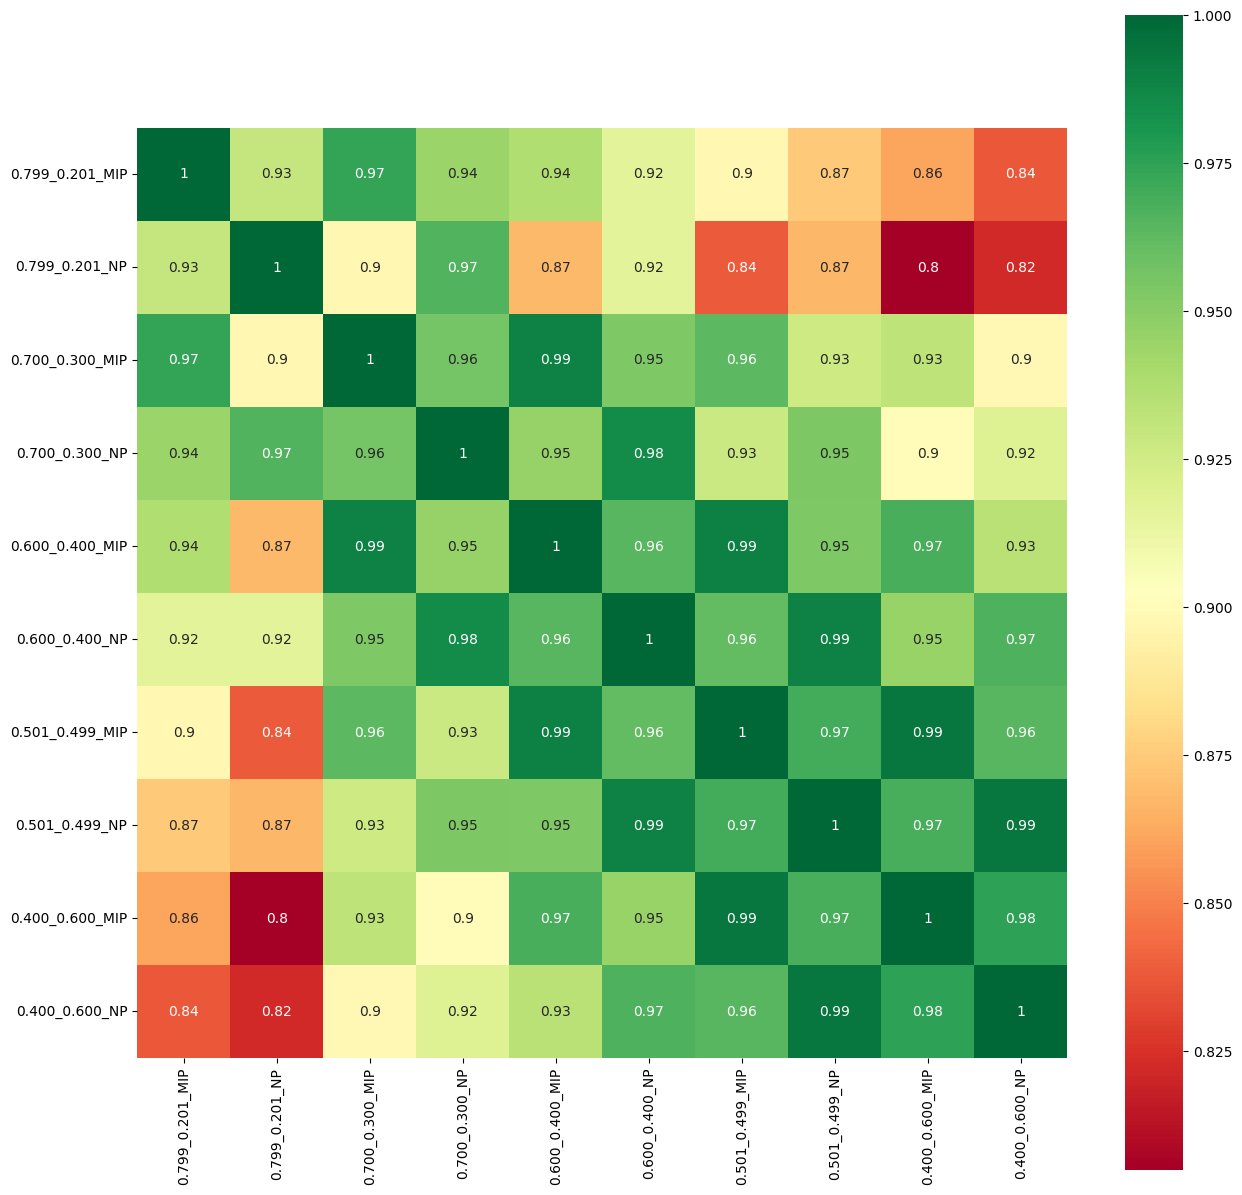

In [71]:
# create correlation matrix X_train
corr_matrix = df.drop(columns=['sensor','type']).corr()

#plot using seaborn heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,vmax=1,square=True,annot=True,cmap='RdYlGn')
plt.show()

### V. Data Preprocessing

#### 1. Check Missing Values for target variable (type)

In [72]:
# check missing values target variable
df['type'].isnull().sum()

0

there's no missing values in target variable

#### 2. Mapping target variable to number

In [73]:
# change target variable 'satisfaction' to number
mapping = {'1-Octanol':0,'1-Propanol':1,'2-Butanol':2,'2-propanol':3,'1-isobutanol':4}
df['type'] = df['type'].map(mapping)

#### 3. Check Duplicated Data

In [74]:
# check duplicates
df.duplicated().sum()

0

there's no duplicated data

#### 4. Splitting Dataset

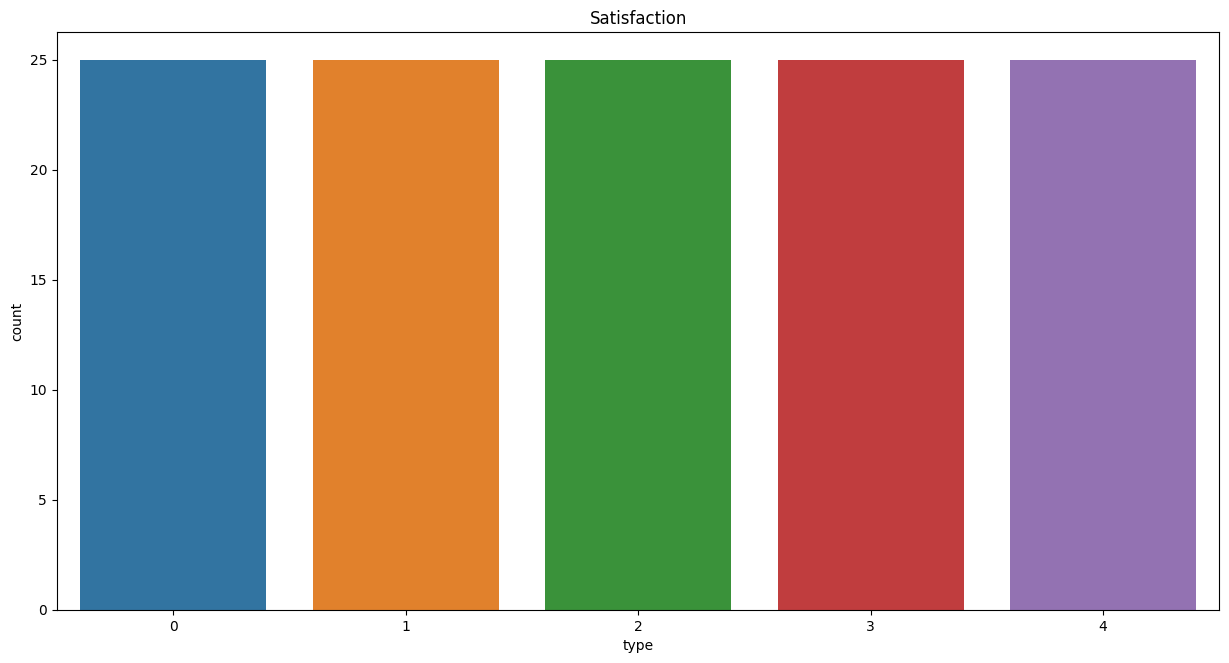

type
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64


In [75]:
#countplot for y
plt.figure(figsize=(15,7.5))
sns.countplot(x=df.type)
plt.title('Satisfaction')
plt.show()

# percentage of y
print(df.type.value_counts(normalize=True))

In [76]:
# split data to X and y
X = df.drop(['type'], axis=1)
y = df['type']

In [101]:
# split X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

# X_train shape
print('X_train shape: ', X_train.shape)

# X_test shape
print('X_test shape: ', X_test.shape)

X_train shape:  (87, 11)
X_test shape:  (38, 11)


#### 5. identify Outlier from Train Dataset

In [102]:
X_train_num = X_train.drop(columns=['sensor'])
X_train_outlier = detect_outlier(X_train_num)
X_train_outlier.detect_outlier()

,feature,skewness,distribution,left_tail,right_tail,total_outlier,percentage
0,0.799_0.201_MIP,0.094708,normal,0,0,0,0.0
1,0.799_0.201_NP,0.081378,normal,0,0,0,0.0
2,0.700_0.300_MIP,-0.030255,normal,0,0,0,0.0
3,0.700_0.300_NP,-0.038469,normal,0,0,0,0.0
4,0.600_0.400_MIP,-0.232169,normal,0,0,0,0.0
5,0.600_0.400_NP,-0.227649,normal,0,0,0,0.0
6,0.501_0.499_MIP,-0.365102,normal,0,0,0,0.0
7,0.501_0.499_NP,-0.341417,normal,0,0,0,0.0
8,0.400_0.600_MIP,-0.511823,skew,0,0,0,0.0
9,0.400_0.600_NP,-0.466082,normal,0,0,0,0.0


based on the result we can find there's no outlier on the train data

#### 6. Identify Missing values from Train & Test Dataset

In [103]:
# check missing values X_train
X_train.isnull().sum()

0.799_0.201_MIP    0
0.799_0.201_NP     0
0.700_0.300_MIP    0
0.700_0.300_NP     0
0.600_0.400_MIP    0
0.600_0.400_NP     0
0.501_0.499_MIP    0
0.501_0.499_NP     0
0.400_0.600_MIP    0
0.400_0.600_NP     0
sensor             0
dtype: int64

In [104]:
# check missing values X_train
X_test.isnull().sum()

0.799_0.201_MIP    0
0.799_0.201_NP     0
0.700_0.300_MIP    0
0.700_0.300_NP     0
0.600_0.400_MIP    0
0.600_0.400_NP     0
0.501_0.499_MIP    0
0.501_0.499_NP     0
0.400_0.600_MIP    0
0.400_0.600_NP     0
sensor             0
dtype: int64

#### 7. Feature Engineering (Scaling & Encoding)

In [105]:
cat_column = ['sensor']
num_column = X_train.drop(columns=['sensor']).columns

pipe_cat = Pipeline([
    ('cat_num',OneHotEncoder(handle_unknown='ignore'))
])

pipe_num = Pipeline([
    ('norm_num',StandardScaler())
])

pipe_fe = ColumnTransformer([
    ('pipe_cat', pipe_cat, cat_column),
    ('pipe_num', pipe_num, num_column),
])

### VI. Model Definition

Because the model is classifcation, the model we use is :
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K-Nearest Neighbors
5. AdaBoost

the metrics we use is :
1. Accuracy/ Micro Average
2. Classfication report

the reason we use Accuracy/Micro average is because the data is balanced.


##### 6.1. Model 1 : Logistic Regression

In [106]:
# baseline model
log_reg = LogisticRegression(random_state=random)

# pipeline model
pipe_log_reg = Pipeline([
    ('fe_transformer', pipe_fe),
    ('log_reg',log_reg)
])

# hyperparameter tuning
param_log_reg = {
    'log_reg__C':[0.01,0.1,1,10],
    'log_reg__solver':['liblinear','newton-cg','sag','saga','lbfgs']

}

##### 6.3 Model 3 : Decision Tree Classifier

In [107]:
# baseline model
dt = DecisionTreeClassifier(random_state=random)

# pipeline model
pipe_dt = Pipeline([
    ('transformer',pipe_fe),
    ('dt',dt),
])

# hyperparameter tuning
param_dt = {
    'dt__min_samples_split':[2,3,4],
    'dt__min_samples_leaf':[1,2,3,4],
    'dt__criterion':['gini','entropy']
}


##### 6.4 Model 4 : Random Forest Classifier

In [108]:
# baseline model
rf = RandomForestClassifier(random_state=random,n_jobs=-1)

# pipeline model
pipe_rf = Pipeline([
    ('transformer',pipe_fe),
    ('rf',rf),
])

# hyperparameter tuning
param_rf = {
    'rf__criterion':['gini','entropy'],
    'rf__n_estimators':[100,150,200],
    'rf__warm_start':[True],
}

##### 6.5 Model 5 : K-Nearest Neighbors

In [109]:
# baseline model
knn = KNeighborsClassifier()

# pipeline model
pipe_knn = Pipeline([
    ('transformer',pipe_fe),
    ('knn',knn),
])

# hyperparameter tuning
param_knn = {
    'knn__n_neighbors':[1,2,3,4,5],
    'knn__weights':['uniform','distance'],
    'knn__algorithm':['auto','ball_tree','kd_tree','brute']
}


##### 6.7 Model 7 : AdaBoost Classifier

In [110]:
# baseline model
ada = AdaBoostClassifier(random_state=random)

# pipeline model
pipe_ada = Pipeline([
    ('transformer',pipe_fe),
    ('ada',ada),
])

# hyperparameter tuning
param_ada = {
    'ada__n_estimators':[10,20,30],
    'ada__learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'ada__algorithm':['SAMME','SAMME.R']
}

### VII. Model Training

In [111]:
# cross validation model

model_list = [pipe_log_reg,pipe_dt,pipe_rf,pipe_knn,pipe_ada]

model_name_list = ['log_reg','dt','rf','knn','ada']
mean = []
std   = []

# for loop to get the accuracy of each model
for i in model_list:
    i.fit(X_train,y_train)
    cv = cross_val_score(i,X_train,y_train,cv=5,scoring='accuracy')
    mean.append(cv.mean())
    std.append(cv.std())

# create dataframe
cv_result = pd.DataFrame({'model':model_name_list,'mean':mean,'std':std})


   
   ### VIII. Model Evaluation

In [112]:
cv_result

,model,mean,std
0,log_reg,0.633333,0.141491
1,dt,0.839869,0.065750
2,rf,0.897386,0.126392
3,knn,0.587582,0.093224
4,ada,0.566013,0.178880


we can see the best model is `Random Forest Classifier`, but to make sure which model is the best we need to evaluate each model with the test set. to find out if the model is goodfit or not.

##### 8.1. Model 1 : Logistic Regression

In [113]:
# cross validation  score
log_reg_train_score = cross_val_score(pipe_log_reg,X_train,y_train,cv=5,scoring='accuracy').mean()
log_reg_train_score

0.6333333333333334

In [114]:
# prediction test data
y_pred_log_reg = pipe_log_reg.predict(X_test)

In [115]:
# test score
log_reg_test_score = accuracy_score(y_test,y_pred_log_reg)
log_reg_test_score

0.6842105263157895

In [116]:
# classification report
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.20      0.17      0.18         6
           2       0.75      0.43      0.55         7
           3       0.75      0.75      0.75        12
           4       0.89      1.00      0.94         8

    accuracy                           0.68        38
   macro avg       0.64      0.67      0.64        38
weighted avg       0.68      0.68      0.67        38



##### 8.2. Model 2 : Decision Tree Classifier

In [117]:
# cross validation  score
dt_train_score = cross_val_score(pipe_dt,X_train,y_train,cv=5,scoring='accuracy').mean()
dt_train_score

0.8398692810457516

In [119]:
# prediction test data
y_pred_dt= pipe_dt.predict(X_test)

In [120]:
# test score
dt_test_score = accuracy_score(y_test,y_pred_dt)
dt_test_score

0.868421052631579

In [121]:
# classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.67      0.73         6
           2       0.86      0.86      0.86         7
           3       0.92      0.92      0.92        12
           4       0.78      0.88      0.82         8

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.86        38
weighted avg       0.87      0.87      0.87        38



##### 8.3 Model 3 : Random Forest Classifier

In [123]:
# cross validation  score
rf_train_score = cross_val_score(pipe_rf,X_train,y_train,cv=5,scoring='accuracy').mean()
rf_train_score

0.8973856209150327

In [125]:
# prediction test data
y_pred_rf= pipe_rf.predict(X_test)

In [126]:
# test score
rf_test_score = accuracy_score(y_test,y_pred_rf)
rf_test_score

1.0

In [127]:
# classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



##### 8.4 Model 4 : K-Nearest Neighbors

In [129]:
# cross validation  score
knn_train_score = cross_val_score(pipe_knn,X_train,y_train,cv=5,scoring='accuracy').mean()
knn_train_score

0.5875816993464051

In [131]:
# prediction test data
y_pred_knn= pipe_knn.predict(X_test)

In [132]:
# test score
knn_test_score = accuracy_score(y_test,y_pred_knn)
knn_test_score

0.6578947368421053

In [133]:
# classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.40      1.00      0.57         6
           2       1.00      0.43      0.60         7
           3       0.75      0.50      0.60        12
           4       1.00      0.62      0.77         8

    accuracy                           0.66        38
   macro avg       0.77      0.71      0.67        38
weighted avg       0.79      0.66      0.66        38



##### 8.5 Model 5 : Ada Boost

In [135]:
# cross validation  score
ada_train_score = cross_val_score(pipe_ada,X_train,y_train,cv=5,scoring='accuracy').mean()
ada_train_score

0.5660130718954248

In [137]:
# prediction on test data
y_pred_ada = pipe_ada.predict(X_test)

In [138]:
# test score
ada_test_score = accuracy_score(y_test,y_pred_ada)
ada_test_score

0.6578947368421053

In [139]:
# classification report
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.40      0.33      0.36         6
           2       0.46      0.86      0.60         7
           3       0.89      0.67      0.76        12
           4       0.67      0.50      0.57         8

    accuracy                           0.66        38
   macro avg       0.68      0.67      0.66        38
weighted avg       0.70      0.66      0.66        38



##### Summary model baseline evaluation

In [140]:
# create dataframe summary with cross validation score and test score
baseline_result = pd.DataFrame({'model':['log_reg','dt','rf','knn','ada'],'train_score':[log_reg_train_score,dt_train_score,rf_train_score,knn_train_score,ada_train_score],'test_score':[log_reg_test_score,dt_test_score,rf_test_score,knn_test_score,ada_test_score]})

baseline_result

,model,train_score,test_score
0,log_reg,0.633333,0.684211
1,dt,0.839869,0.868421
2,rf,0.897386,1.000000
3,knn,0.587582,0.657895
4,ada,0.566013,0.657895


##### 8.4 Model Tuning using GridSearchCV

##### Model 2 : Decision Tree Classifier

In [149]:
# decision tree model

dt_grid = GridSearchCV(
    pipe_dt,
    param_dt,
    cv=5,
    scoring='accuracy',
    verbose=1
).fit(X_train,y_train)

best_params_dt = dt_grid.best_params_
best_pipe_dt = dt_grid.best_estimator_
df_result_dt = pd.DataFrame.from_dict(dt_grid.cv_results_,orient='columns')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [150]:
# best parameters
best_params_dt

{'dt__criterion': 'gini',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 4}

In [151]:
# best score
dt_grid.best_score_

0.8509803921568627

In [153]:
# predict test with best parameters
y_pred_dt_grid = best_pipe_dt.predict(X_test)

In [154]:
# f1 weighted score
print(accuracy_score(y_test,y_pred_dt_grid))

0.868421052631579


In [155]:
# classification report
print(classification_report(y_test,y_pred_dt_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.67      0.73         6
           2       0.86      0.86      0.86         7
           3       0.92      0.92      0.92        12
           4       0.78      0.88      0.82         8

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.86        38
weighted avg       0.87      0.87      0.87        38

